## bedrock head predictiion: classification
### 1. 데이터 전처리
- null 값 삭제
- 지반명 숫자 지정(시각화를 위함)
- 데이터 시각화(3d plotting)
- 크리깅 데이터 전처리(풍화암층, 연암층)

### 2. 학습, 평가
- 학습데이터, 평가데이터 split
- Decision Tree
- xgboost
- Random Forest
- MLP
- SVM

- Stacking : Logistic Regression

### 3. 모델 시각화


### 1. 데이터 전처리
    - null 값 삭제
    - 지반명 숫자 지정
    - 데이터 시각화(3d plotting)

In [2]:
import pandas as pd
import numpy as np

In [3]:
borehole_data=pd.read_csv('시추주상도_건대_full.csv')
display(borehole_data.info())
display(borehole_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   조사명     520 non-null    object 
 1   시추번호    520 non-null    object 
 2   좌표(x)   520 non-null    float64
 3   좌표(y)   520 non-null    float64
 4   표고      520 non-null    float64
 5   심도      520 non-null    float64
 6   층_표고    520 non-null    float64
 7   층후      520 non-null    float64
 8   지반명     520 non-null    object 
dtypes: float64(6), object(3)
memory usage: 36.7+ KB


None

,조사명,시추번호,좌표(x),좌표(y),표고,심도,층_표고,층후,지반명
0,자양동 주상복합 신축공사,NX-1,207342.144,548662.808,0.0,1.0,-1.0,1.0,매립토층
1,자양동 주상복합 신축공사,NX-1,207342.144,548662.808,0.0,1.8,-1.8,1.8,매립토층
2,자양동 주상복합 신축공사,NX-1,207342.144,548662.808,0.0,2.8,-2.8,1.0,퇴적토층
3,자양동 주상복합 신축공사,NX-1,207342.144,548662.808,0.0,3.8,-3.8,2.0,퇴적토층
4,자양동 주상복합 신축공사,NX-1,207342.144,548662.808,0.0,4.7,-4.7,2.9,퇴적토층


- null값 삭제

In [4]:
borehole_data = borehole_data.dropna(axis=0)
borehole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   조사명     520 non-null    object 
 1   시추번호    520 non-null    object 
 2   좌표(x)   520 non-null    float64
 3   좌표(y)   520 non-null    float64
 4   표고      520 non-null    float64
 5   심도      520 non-null    float64
 6   층_표고    520 non-null    float64
 7   층후      520 non-null    float64
 8   지반명     520 non-null    object 
dtypes: float64(6), object(3)
memory usage: 36.7+ KB


- 데이터 시각화

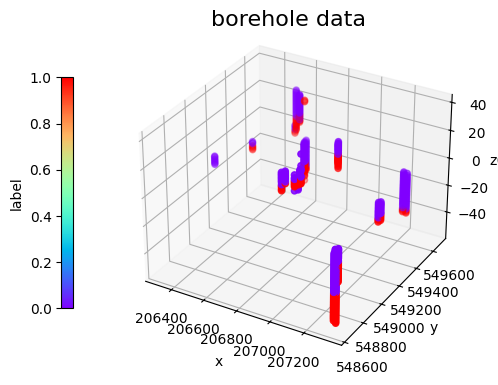

In [8]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

x=borehole_data['좌표(x)']
y=borehole_data['좌표(y)']
z=borehole_data['층_표고']
c=borehole_data['지반명_number']

map=ax.scatter(x,y,z, marker='o', c=c, s=20, cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z(m)')

plt.colorbar(map, label='label', shrink=0.5, location='left')

plt.suptitle('borehole data',fontsize=16, x=0.6, y=0.8)

plt.show()

- 크리깅 데이터 전처리(풍화암층, 연암층)

In [9]:
weather_data=pd.read_csv('kriging_weather_small.csv')
soft_data=pd.read_csv('kriging_soft_small.csv')

display(weather_data.head(3))
display(weather_data.tail(3))

display(soft_data.head(3))
display(soft_data.tail(3))

,조사명,좌표(x),좌표(y),층_표고
0,64,206312,549220,-9.239521
1,315,206330,549409,-7.382288
2,566,206348,549598,-7.256740


,조사명,좌표(x),좌표(y),층_표고
43,12614,207293,549355,-19.421631
44,12865,207311,549544,-28.069004
45,13116,207338,548698,-7.652251


,조사명,좌표(x),좌표(y),층_표고
0,6900,206852,548644,-8.457661
1,7250,206879,548689,-1.541567
2,7500,206897,548869,10.920792


,조사명,좌표(x),좌표(y),층_표고
51,13000,207329,548689,-18.109557
52,13050,207329,549139,-15.259823
53,13150,207338,549004,-7.048698


In [10]:
weather_data['지반명_number']=0;
soft_data['지반명_number']=1;

weather_data = weather_data.iloc[:,1:5]
soft_data = soft_data.iloc[:,1:5]

display(weather_data.head())
display(soft_data.head())

rock_data=pd.DataFrame(pd.concat([weather_data,soft_data],ignore_index=True))
display(rock_data)

,좌표(x),좌표(y),층_표고,지반명_number
0,206312,549220,-9.239521,0
1,206330,549409,-7.382288,0
2,206348,549598,-7.256740,0
3,206429,549319,-9.322186,0
4,206447,549508,-6.983525,0


,좌표(x),좌표(y),층_표고,지반명_number
0,206852,548644,-8.457661,1
1,206879,548689,-1.541567,1
2,206897,548869,10.920792,1
3,206906,548734,2.039000,1
4,206924,548914,13.424117,1


,좌표(x),좌표(y),층_표고,지반명_number
0,206312,549220,-9.239521,0
1,206330,549409,-7.382288,0
2,206348,549598,-7.256740,0
3,206429,549319,-9.322186,0
4,206447,549508,-6.983525,0
...,...,...,...,...
95,207311,548959,-5.314995,1
96,207320,548824,-8.528553,1
97,207329,548689,-18.109557,1
98,207329,549139,-15.259823,1


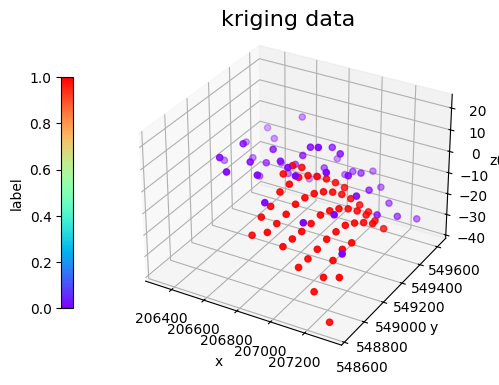

In [11]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

x=rock_data['좌표(x)']
y=rock_data['좌표(y)']
z=rock_data['층_표고']
c=rock_data['지반명_number']

map=ax.scatter(x,y,z, marker='o', c=c, s=20, cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z(m)')

plt.colorbar(map, label='label', shrink=0.5, location='left')

plt.suptitle('kriging data',fontsize=16, x=0.6, y=0.8)

plt.show()

### 2. 학습, 평가
- 학습, 예측 데이터 split
- Decision Tree
- xgboost
- Random Forest
- SVM
- MLP
- stacking : logistic regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

- 학습, 예측 데이터 split

In [13]:
#origin data(X,Y)
X=borehole_data.iloc[:,[0,1,2]]
Y=borehole_data.iloc[:,-1]
display(X.head(1))
display(Y.head(1))

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=150)

X_tr,X_val,y_tr,y_val=train_test_split(X,Y,test_size=0.1,random_state=150)

#origin data+kriging data(X1,Y1)
X1=pd.concat([X,rock_data.iloc[:,[0,1,2]]],ignore_index=True)
Y1=pd.concat([Y,rock_data.iloc[:,-1]],ignore_index=True)

display(X1.iloc[55])
display(Y1.iloc[55])

X1_train, X1_test, y1_train, y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=150)

X1_tr,X1_val,y1_tr,y1_val=train_test_split(X1,Y1,test_size=0.1,random_state=150)

,좌표(x),좌표(y),층_표고
0,207342.144,548662.808,-1.0


0    0
Name: 지반명_number, dtype: int64

좌표(x)    207336.139
좌표(y)    548653.806
층_표고        -35.600
Name: 55, dtype: float64

1

- Decision Tree

In [14]:
#origin data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=150)
dt_parameters = {'max_depth': [5,7,10,13,16,19],
             'min_samples_split':[3,6,9,12,15,18,21]}

grid_dt = GridSearchCV(dt_clf, param_grid = dt_parameters, cv = 5)

grid_dt.fit(X_train,y_train)

dt_result = pd.DataFrame(grid_dt.cv_results_['params'])
dt_result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
dt_result.sort_values(by='mean_test_score', ascending=False).head()

,max_depth,min_samples_split,mean_test_score
21,13,3,0.901434
28,16,3,0.901434
35,19,3,0.901434
14,10,3,0.877338
36,19,6,0.867814


In [15]:
#origin data+kriging data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt1_clf=DecisionTreeClassifier(random_state=150)
dt_parameters = {'max_depth': [5,7,10,13,16,19],
             'min_samples_split':[3,6,9,12,15,18,21]}

grid1_dt = GridSearchCV(dt1_clf, param_grid = dt_parameters, cv = 5)

grid1_dt.fit(X1_train,y1_train)

dt1_result = pd.DataFrame(grid1_dt.cv_results_['params'])
dt1_result['mean_test_score'] = grid1_dt.cv_results_['mean_test_score']
dt1_result.sort_values(by='mean_test_score', ascending=False).head(10)

,max_depth,min_samples_split,mean_test_score
21,13,3,0.868970
28,16,3,0.868970
35,19,3,0.868970
14,10,3,0.862929
36,19,6,0.860848
29,16,6,0.860848
15,10,6,0.858869
22,13,6,0.858848
30,16,9,0.844707
23,13,9,0.844707


In [16]:
dt_clf=DecisionTreeClassifier(random_state=150,max_depth=13,min_samples_split=3)
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)

dt1_clf=DecisionTreeClassifier(random_state=150,max_depth=16,min_samples_split=3)
dt1_clf.fit(X1_train,y1_train)
dt1_pred=dt1_clf.predict(X1_test)

- XGBoost

In [17]:
#origin data
from xgboost import XGBClassifier

xgb_clf= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

grid_xgb=GridSearchCV(xgb_clf, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1)
grid_xgb.fit(X_train,y_train)

xgb_result = pd.DataFrame(grid_xgb.cv_results_['params'])
xgb_result['mean_test_score'] = grid_xgb.cv_results_['mean_test_score']
xgb_result.sort_values(by='mean_test_score', ascending=False).head(10)

,colsample_bytree,gamma,learning_rate,max_depth,n_estimators,mean_test_score
39,0.8,0,0.05,7,500,0.910503
439,0.9,0,0.05,7,500,0.910503
73,0.8,0,0.10,15,400,0.910204
473,0.9,0,0.10,15,400,0.910204
72,0.8,0,0.10,15,300,0.907796
472,0.9,0,0.10,15,300,0.907796
462,0.9,0,0.10,7,300,0.907627
62,0.8,0,0.10,7,300,0.907627
498,0.9,0,0.15,15,400,0.907402
69,0.8,0,0.10,10,500,0.907402


In [18]:
#origin data+kriging data
from xgboost import XGBClassifier

xgb1_clf= XGBClassifier()

xgb1_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

grid1_xgb=GridSearchCV(xgb1_clf, param_grid = xgb1_param_grid, scoring="f1_macro", n_jobs=-1)
grid1_xgb.fit(X1_train,y1_train)

xgb1_result = pd.DataFrame(grid1_xgb.cv_results_['params'])
xgb1_result['mean_test_score'] = grid1_xgb.cv_results_['mean_test_score']
xgb1_result.sort_values(by='mean_test_score', ascending=False).head(10)

,colsample_bytree,gamma,learning_rate,max_depth,n_estimators,mean_test_score
462,0.9,0,0.10,7,300,0.871682
62,0.8,0,0.10,7,300,0.871682
487,0.9,0,0.15,7,300,0.868870
87,0.8,0,0.15,7,300,0.868870
88,0.8,0,0.15,7,400,0.866848
488,0.9,0,0.15,7,400,0.866848
64,0.8,0,0.10,7,500,0.866696
464,0.9,0,0.10,7,500,0.866696
493,0.9,0,0.15,10,400,0.864966
494,0.9,0,0.15,10,500,0.864966


In [19]:
xgb_clf=XGBClassifier(eval_metric='rmse',colsample_bytree=0.8,gamma=0,learning_rate=0.05,
                      max_depth=10,n_estimators=500)
xgb_clf.fit(X_train,y_train)
xgb_pred=xgb_clf.predict(X_test)

xgb1_clf=XGBClassifier(eval_metric='rmse',colsample_bytree=0.9,gamma=0,learning_rate=0.15,
                      max_depth=10,n_estimators=500)
xgb1_clf.fit(X1_train,y1_train)
xgb1_pred=xgb1_clf.predict(X1_test)

- Random Forest

In [20]:
#origin data
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf_params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
grid_rf = GridSearchCV(rf_clf , param_grid=rf_params , cv=2, n_jobs=-1 )

grid_rf.fit(X_train, y_train)

rf_result = pd.DataFrame(grid_rf.cv_results_['params'])
rf_result['mean_test_score'] = grid_rf.cv_results_['mean_test_score']
rf_result.sort_values(by='mean_test_score', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,mean_test_score
18,24,1,2,0.923077
9,16,1,2,0.923077
0,8,1,2,0.918269
10,16,1,8,0.860577
19,24,1,8,0.860577


In [21]:
#origin data+kriging data
from sklearn.ensemble import RandomForestClassifier

rf1_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf1_params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
grid1_rf = GridSearchCV(rf1_clf , param_grid=rf1_params , cv=2, n_jobs=-1 )

grid1_rf.fit(X1_train,y1_train)

rf1_result = pd.DataFrame(grid1_rf.cv_results_['params'])
rf1_result['mean_test_score'] = grid1_rf.cv_results_['mean_test_score']
rf1_result.sort_values(by='mean_test_score', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,mean_test_score
0,8,1,2,0.842742
18,24,1,2,0.832661
9,16,1,2,0.832661
1,8,1,8,0.816532
19,24,1,8,0.808468


In [22]:
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, 
                              max_depth=24, min_samples_leaf=1, min_samples_split=2)
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)

rf1_clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, 
                              max_depth=8, min_samples_leaf=1, min_samples_split=2)
rf1_clf.fit(X1_train,y1_train)
rf1_pred=rf1_clf.predict(X1_test)

- SVM

In [23]:
#origin data
from sklearn import svm

svm_clf=svm.SVC(kernel='rbf',random_state=100)
svm_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100,500,1000],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf, param_grid = svm_parameters, cv = 5)

grid_svm.fit(X_train, y_train)

svm_result = pd.DataFrame(grid_svm.cv_results_['params'])
svm_result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
svm_result.sort_values(by='mean_test_score', ascending=False).head()

,C,gamma,mean_test_score
72,1000.0,0.001,0.939874
73,1000.0,0.010,0.937435
65,500.0,0.010,0.937435
49,50.0,0.010,0.935026
57,100.0,0.010,0.935026


In [24]:
#origin data+kriging

svm1_clf=svm.SVC(kernel='rbf',random_state=100)
svm1_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100,500,1000],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid1_svm = GridSearchCV(svm1_clf, param_grid = svm1_parameters, cv = 5)

grid1_svm.fit(X1_train, y1_train)

svm1_result = pd.DataFrame(grid1_svm.cv_results_['params'])
svm1_result['mean_test_score'] = grid1_svm.cv_results_['mean_test_score']
svm1_result.sort_values(by='mean_test_score', ascending=False).head()

,C,gamma,mean_test_score
34,10.0,0.1,0.87099
42,25.0,0.1,0.87099
58,100.0,0.1,0.86697
74,1000.0,0.1,0.86697
66,500.0,0.1,0.86697


In [25]:
svm_clf=svm.SVC(kernel='rbf',random_state=100,C=1000,gamma=0.01)
svm_clf.fit(X_train,y_train)
svm_pred=svm_clf.predict(X_test)

svm1_clf=svm.SVC(kernel='rbf',random_state=100,C=10,gamma=0.1)
svm1_clf.fit(X1_train,y1_train)
svm1_pred=svm1_clf.predict(X1_test)

- MLP

In [26]:
#origin data
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()

mlp_parameters={'hidden_layer_sizes': [i for i in range(4,25)],
              'activation': ['tanh'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [10000],
              'early_stopping': [False],
              'warm_start': [False]}

grid_mlp = GridSearchCV(mlp_clf, param_grid=mlp_parameters)

grid_mlp.fit(X_train, y_train)

mlp_result = pd.DataFrame(grid_mlp.cv_results_['params'])
mlp_result['mean_test_score'] = grid_mlp.cv_results_['mean_test_score']
mlp_result.sort_values(by='mean_test_score', ascending=False).head()

,activation,alpha,early_stopping,hidden_layer_sizes,learning_rate,learning_rate_init,max_iter,power_t,solver,warm_start,mean_test_score
0,tanh,0.0001,False,4,constant,0.001,10000,0.5,adam,False,0.653844
11,tanh,0.0001,False,15,constant,0.001,10000,0.5,adam,False,0.653844
19,tanh,0.0001,False,23,constant,0.001,10000,0.5,adam,False,0.653844
18,tanh,0.0001,False,22,constant,0.001,10000,0.5,adam,False,0.653844
17,tanh,0.0001,False,21,constant,0.001,10000,0.5,adam,False,0.653844


In [27]:
#origin data+kriging
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()

mlp_parameters={'hidden_layer_sizes': [i for i in range(4,25)],
              'activation': ['tanh'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [10000],
              'early_stopping': [False],
              'warm_start': [False]}

grid_mlp = GridSearchCV(mlp_clf, param_grid=mlp_parameters)

grid_mlp.fit(X1_train, y1_train)

mlp_result = pd.DataFrame(grid_mlp.cv_results_['params'])
mlp_result['mean_test_score'] = grid_mlp.cv_results_['mean_test_score']
mlp_result.sort_values(by='mean_test_score', ascending=False).head()

,activation,alpha,early_stopping,hidden_layer_sizes,learning_rate,learning_rate_init,max_iter,power_t,solver,warm_start,mean_test_score
0,tanh,0.0001,False,4,constant,0.001,10000,0.5,adam,False,0.616929
9,tanh,0.0001,False,13,constant,0.001,10000,0.5,adam,False,0.616929
19,tanh,0.0001,False,23,constant,0.001,10000,0.5,adam,False,0.616929
18,tanh,0.0001,False,22,constant,0.001,10000,0.5,adam,False,0.616929
15,tanh,0.0001,False,19,constant,0.001,10000,0.5,adam,False,0.616929


In [28]:
mlp_clf=MLPClassifier(hidden_layer_sizes=4, activation='tanh', solver='adam', learning_rate='constant',
              learning_rate_init=0.001, power_t=0.5, alpha=0.0001, max_iter=10000,
              early_stopping=False, warm_start=False)
mlp_clf.fit(X_train,y_train)
mlp_pred=mlp_clf.predict(X_test)

mlp1_clf=MLPClassifier(hidden_layer_sizes=24, activation='tanh', solver='adam', learning_rate='constant',
              learning_rate_init=0.001, power_t=0.5, alpha=0.0001, max_iter=10000,
              early_stopping=False, warm_start=False)
mlp1_clf.fit(X1_train,y1_train)
mlp1_pred=mlp1_clf.predict(X1_test)

- Stacking - logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr_final = LogisticRegression()

In [30]:
from sklearn.ensemble import StackingClassifier

estimators = [
     ('dt_clf', dt_clf),
     ('xgb_clf', xgb_clf),
     ('rf_clf', rf_clf),
     ('svm_clf', svm_clf),
     ('mlp_clf',mlp_clf)
]

sclf = StackingClassifier(estimators=estimators,final_estimator=lr_final,cv=5)
sclf.fit(X_train,y_train)
sclf_pred=sclf.predict(X_test)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , sclf_pred)))

최종 메타 모델의 예측 정확도: 0.9423


In [31]:
from sklearn.ensemble import StackingClassifier

estimators = [
     ('dt_clf', dt1_clf),
     ('xgb_clf', xgb1_clf),
     ('rf_clf', rf1_clf),
     ('svm_clf', svm1_clf),
     ('mlp_clf',mlp1_clf)
]

sclf1 = StackingClassifier(estimators=estimators,final_estimator=lr_final,cv=5)
sclf1.fit(X1_train,y1_train)
sclf1_pred=sclf1.predict(X1_test)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y1_test , sclf1_pred)))

최종 메타 모델의 예측 정확도: 0.9516


- Votting

In [33]:
#original
from sklearn.ensemble import VotingClassifier

estimators = [
     ('dt_clf', dt_clf),
     ('xgb_clf', xgb_clf),
     ('rf_clf', rf_clf),
     ('svm_clf', svm_clf),
     ('mlp_clf',mlp_clf)
]

clf = VotingClassifier(estimators=estimators)
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , clf_pred)))

최종 메타 모델의 예측 정확도: 0.9519


In [34]:
#original +kriging
from sklearn.ensemble import VotingClassifier

estimators = [
     ('dt_clf', dt1_clf),
     ('xgb_clf', xgb1_clf),
     ('rf_clf', rf1_clf),
     ('svm_clf', svm1_clf),
     ('mlp_clf',mlp1_clf)
]

clf1 = VotingClassifier(estimators=estimators)
clf1.fit(X1_train,y1_train)
clf1_pred=clf1.predict(X1_test)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y1_test , clf1_pred)))

최종 메타 모델의 예측 정확도: 0.9516


### 2-1. 분류모델 평가
- 정확도 accuracy
- precision, recall, f1 score

accuracy : 0.9519
precision : 0.9302
recall : 0.9524
f1 score : 0.9412


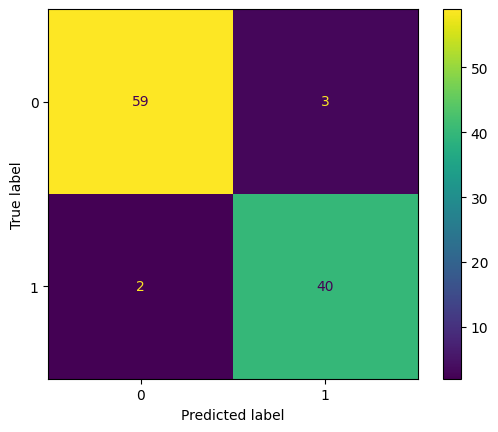

In [35]:
# original
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf_pred=clf.predict(X_test)

accuracy = accuracy_score(y_test, clf_pred)
precision = precision_score(y_test,clf_pred)
recall = recall_score(y_test, clf_pred)
f1 = f1_score(y_test,clf_pred)

print('accuracy : {0:.4f}'.format(accuracy))
print('precision : {0:.4f}'.format(precision))
print('recall : {0:.4f}'.format(recall))
print('f1 score : {0:.4f}'.format(f1))

con_mat = confusion_matrix(y_test,clf_pred)
con_mat_dis = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=clf.classes_)

con_mat_dis.plot()
plt.show()


accuracy : 0.9808
precision : 0.9762
recall : 0.9762
f1 score : 0.9762


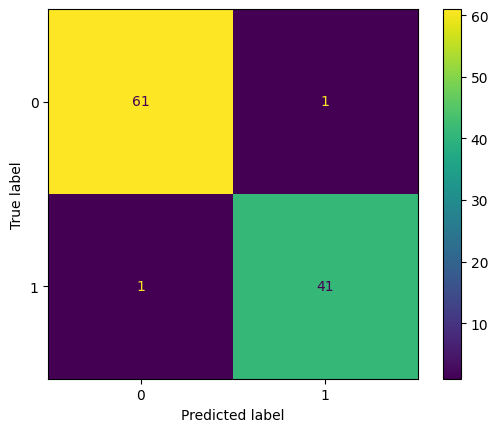

In [36]:
# original + kriging
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf1_pred=clf1.predict(X_test)

accuracy_1 = accuracy_score(y_test, clf1_pred)
precision_1 = precision_score(y_test,clf1_pred)
recall_1 = recall_score(y_test, clf1_pred)
f1_1 = f1_score(y_test,clf1_pred)

print('accuracy : {0:.4f}'.format(accuracy_1))
print('precision : {0:.4f}'.format(precision_1))
print('recall : {0:.4f}'.format(recall_1))
print('f1 score : {0:.4f}'.format(f1_1))

con_mat1 = confusion_matrix(y_test,clf1_pred)
con_mat_dis1 = ConfusionMatrixDisplay(confusion_matrix=con_mat1, display_labels=clf1.classes_)

con_mat_dis1.plot()
plt.show()

### 3. 모델 시각화

In [37]:
borehole_model_df=pd.DataFrame(columns=['좌표(x)','좌표(y)','층_표고'])

xmin=int(borehole_data['좌표(x)'].min())
xmax=int(borehole_data['좌표(x)'].max())
ymin=int(borehole_data['좌표(y)'].min())
ymax=int(borehole_data['좌표(y)'].max())
zmin=int(borehole_data['층_표고'].min())
zmax=int(borehole_data['층_표고'].max())

for x in range(xmin,xmax,30):
    for y in range(ymin,ymax,30):
        for z in range (zmin,zmax,3):
            x=float(x)
            y=float(y)
            z=float(z)
            borehole_model_df=pd.concat([borehole_model_df, pd.DataFrame([(x,y,z)],columns=borehole_model_df.columns)])

borehole_model_df.dropna(axis=0, inplace=True)
clf_pred=clf.predict(borehole_model_df)

borehole_model_df['label']=clf_pred

display(borehole_model_df.head(3))
display(borehole_model_df.tail(3))

/var/folders/jm/y3p2nc3142sgnvz8slzmdrdc0000gq/T/ipykernel_70309/1376037751.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  borehole_model_df=pd.concat([borehole_model_df, pd.DataFrame([(x,y,z)],columns=borehole_model_df.columns)])


,좌표(x),좌표(y),층_표고,label
0,206312.0,548644.0,-53.0,1
0,206312.0,548644.0,-50.0,1
0,206312.0,548644.0,-47.0,1


,좌표(x),좌표(y),층_표고,label
0,207332.0,549664.0,31.0,0
0,207332.0,549664.0,34.0,0
0,207332.0,549664.0,37.0,0


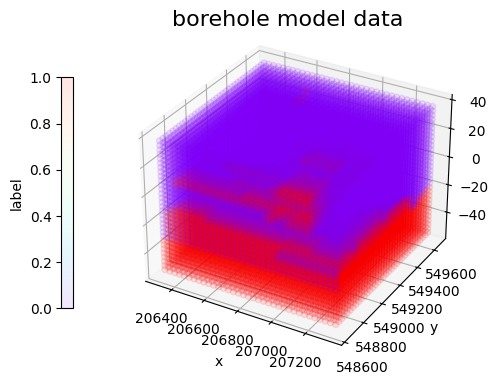

In [38]:
borehole_model_df.reset_index(drop=True, inplace=True)

x=borehole_model_df['좌표(x)']
y=borehole_model_df['좌표(y)']
z=borehole_model_df['층_표고']
c=borehole_model_df['label']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

map=ax.scatter(x,y,z, marker='o', c=c, s=20,cmap='rainbow',alpha=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.colorbar(map, label='label',shrink=0.5, location='left')

plt.suptitle('borehole model data',fontsize=16, x=0.6, y=0.8)

plt.show()

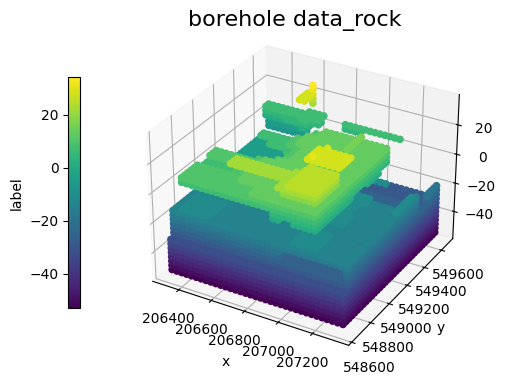

In [39]:
borehole_model_df.reset_index(drop=True, inplace=True)
borehole_base_df = borehole_model_df[borehole_model_df['label']==1]

x=borehole_base_df['좌표(x)']
y=borehole_base_df['좌표(y)']
z=borehole_base_df['층_표고']
c=borehole_base_df['label']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')
map=ax.scatter(x,y,z, marker='o', c=z, s=20,alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.colorbar(map, label='label',shrink=0.5, location='left')
plt.suptitle('borehole data_rock',fontsize=16, x=0.6, y=0.8)
plt.show()

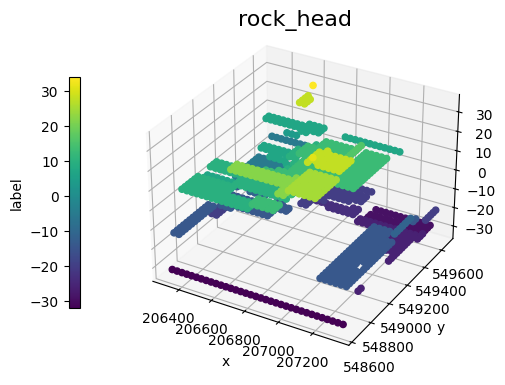

In [85]:
rock_head_df=borehole_base_df.iloc[:,[0,1,2]]
rock_head_df=rock_head_df.groupby(['좌표(x)','좌표(y)'])

rock_head_df=rock_head_df.max('층_표고')
rock_head_df=rock_head_df.reset_index('좌표(x)').reset_index('좌표(y)')
x=rock_head_df['좌표(x)']
y=rock_head_df['좌표(y)']
z=rock_head_df['층_표고']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')
map=ax.scatter(x,y,z, marker='o', c=z, s=20,alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.colorbar(map, label='label',shrink=0.5, location='left')
plt.suptitle('rock_head',fontsize=16, x=0.6, y=0.8)
plt.show()

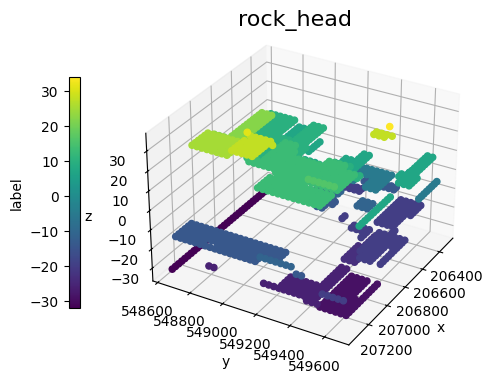

In [86]:
rock_head_df=borehole_base_df.iloc[:,[0,1,2]]
rock_head_df=rock_head_df.groupby(['좌표(x)','좌표(y)'])

rock_head_df=rock_head_df.max('층_표고')
rock_head_df=rock_head_df.reset_index('좌표(x)').reset_index('좌표(y)')
x=rock_head_df['좌표(x)']
y=rock_head_df['좌표(y)']
z=rock_head_df['층_표고']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')
map=ax.scatter(x,y,z, marker='o', c=z, s=20,alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,30)

plt.colorbar(map, label='label',shrink=0.5, location='left')
plt.suptitle('rock_head',fontsize=16, x=0.6, y=0.8)
plt.show()

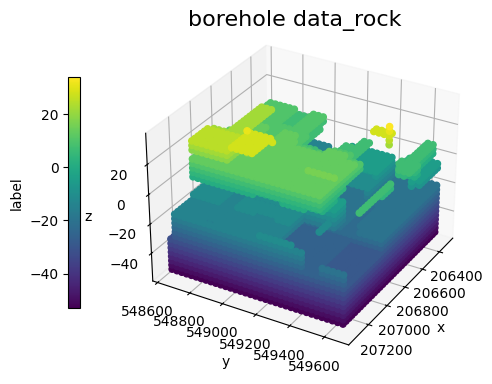

In [ ]:
x=borehole_base_df['좌표(x)']
y=borehole_base_df['좌표(y)']
z=borehole_base_df['층_표고']
c=borehole_base_df['label']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')
map=ax.scatter(x,y,z, marker='o', c=z, s=20,alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,30)

plt.colorbar(map, label='label',shrink=0.5, location='left')
plt.suptitle('borehole data_rock',fontsize=16, x=0.6, y=0.8)
plt.show()

In [ ]:
borehole_model_df1=pd.DataFrame(columns=['좌표(x)','좌표(y)','층_표고'])

xmin=int(borehole_data['좌표(x)'].min())
xmax=int(borehole_data['좌표(x)'].max())
ymin=int(borehole_data['좌표(y)'].min())
ymax=int(borehole_data['좌표(y)'].max())
zmin=int(borehole_data['층_표고'].min())
zmax=int(borehole_data['층_표고'].max())

for x in range(xmin,xmax,0.5):
    for y in range(ymin,ymax,0.5):
        for z in range (zmin,zmax,0.5):
            x=float(x)
            y=float(y)
            z=float(z)
            borehole_model_df1=pd.concat([borehole_model_df1, pd.DataFrame([(x,y,z)],columns=borehole_model_df1.columns)])

borehole_model_df.dropna(axis=0, inplace=True)

clf1_pred=clf1.predict(borehole_model_df1)

borehole_model_df1['label']=clf1_pred

display(borehole_model_df1.head(3))
display(borehole_model_df1.tail(3))

/var/folders/jm/y3p2nc3142sgnvz8slzmdrdc0000gq/T/ipykernel_32648/3175851344.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  borehole_model_df1=pd.concat([borehole_model_df1, pd.DataFrame([(x,y,z)],columns=borehole_model_df1.columns)])


,좌표(x),좌표(y),층_표고,label
0,206312.0,548644.0,-53.0,1
0,206312.0,548644.0,-50.0,1
0,206312.0,548644.0,-47.0,1


,좌표(x),좌표(y),층_표고,label
0,207332.0,549664.0,31.0,0
0,207332.0,549664.0,34.0,0
0,207332.0,549664.0,37.0,0


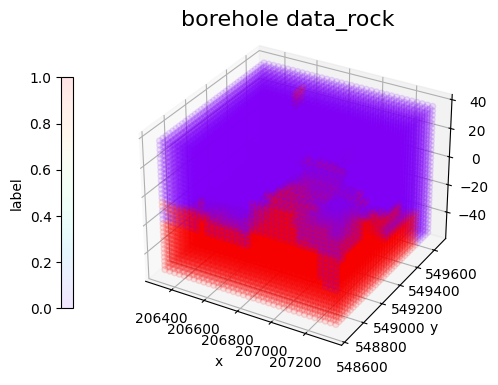

In [ ]:
borehole_model_df1.reset_index(drop=True, inplace=True)

x=borehole_model_df1['좌표(x)']
y=borehole_model_df1['좌표(y)']
z=borehole_model_df1['층_표고']
c=borehole_model_df1['label']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

map=ax.scatter(x,y,z, marker='o', c=c, s=20,cmap='rainbow',alpha=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.colorbar(map, label='label',shrink=0.5, location='left')

plt.suptitle('borehole data_rock',fontsize=16, x=0.6, y=0.8)

plt.show()

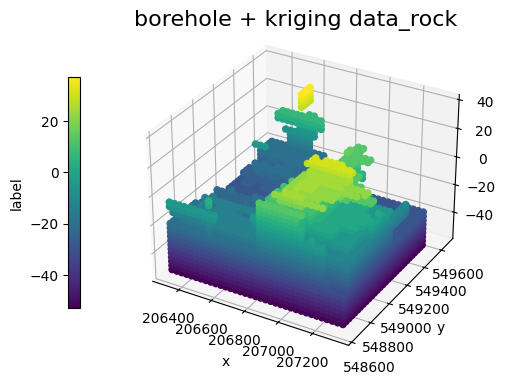

In [ ]:
borehole_model_df1.reset_index(drop=True, inplace=True)
borehole_base_df1 = borehole_model_df1[borehole_model_df1['label']==1]

x=borehole_base_df1['좌표(x)']
y=borehole_base_df1['좌표(y)']
z=borehole_base_df1['층_표고']
c=borehole_base_df1['label']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

map=ax.scatter(x,y,z, marker='o', c=z, s=20,alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.colorbar(map, label='label',shrink=0.5, location='left')
plt.suptitle('borehole + kriging data_rock',fontsize=16, x=0.6, y=0.8)
plt.show()

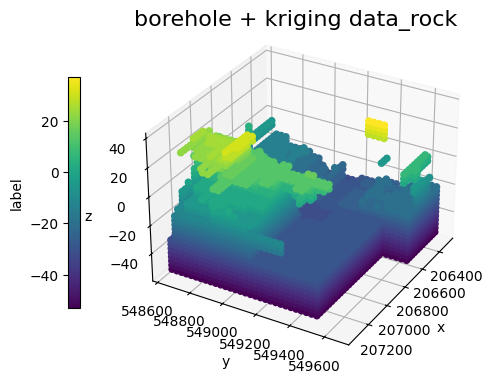

In [ ]:
borehole_model_df1.reset_index(drop=True, inplace=True)
borehole_base_df1 = borehole_model_df1[borehole_model_df1['label']==1]

x=borehole_base_df1['좌표(x)']
y=borehole_base_df1['좌표(y)']
z=borehole_base_df1['층_표고']
c=borehole_base_df1['label']

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

map=ax.scatter(x,y,z, marker='o', c=z, s=20,alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,30)

plt.colorbar(map, label='label',shrink=0.5, location='left')
plt.suptitle('borehole + kriging data_rock',fontsize=16, x=0.6, y=0.8)
plt.show()